In [ ]:
# 3. **Modelos de Clasificación**
   - **Utilidad:** Este grupo de métodos se utiliza para asignar etiquetas a las muestras basadas en sus características. Es útil en tareas de clasificación donde la salida es una categoría discreta.
   - **Funciones comunes:**
     - **LogisticRegression:** Modelo de regresión logística para clasificación binaria o multiclase.
     - **KNeighborsClassifier:** Clasificación basada en los k vecinos más cercanos.
     - **SVC (Support Vector Classification):** Clasificación usando máquinas de vectores de soporte.
     - **DecisionTreeClassifier:** Clasificación usando árboles de decisión.
     - **RandomForestClassifier:** Clasificación usando bosques aleatorios.
     - **GradientBoostingClassifier:** Clasificación usando boosting de gradiente.

In [ ]:
## Carga de datos y preparación
Importamos el dataset wine y las bibliotecas necesarias. X contiene las características y y las etiquetas.

In [65]:
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Load the dataset
data = load_wine()
X = data.data
y = data.target

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the dataset
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [ ]:
## LogisticRegression
Entrenamos un modelo de regresión logística y evaluamos su precisión.

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.97


In [ ]:
## KNeighborsClassifier
Entrenamos un modelo K-vecinos más cercanos y evaluamos su precisión.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNeighborsClassifier with adjusted neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'K-Neighbors Classifier Accuracy: {accuracy:.2f}')


K-Neighbors Classifier Accuracy: 0.81


In [ ]:
## SVC (Support Vector Classification)

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier with an 'rbf' kernel
model = SVC(kernel='rbf', random_state=42, C=1.0)

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {accuracy:.2f}')


SVC Accuracy: 0.69


In [ ]:
## DecisionTreeClassifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier with max_depth
model = DecisionTreeClassifier(random_state=42, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier Accuracy: {accuracy:.2f}')


Decision Tree Classifier Accuracy: 0.94


In [ ]:
## RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier with max_depth
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy:.2f}')


Random Forest Classifier Accuracy: 1.00


In [ ]:
## GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting Classifier with learning_rate and max_depth
model = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=3)

# Train the model
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Classifier Accuracy: {accuracy:.2f}')


Gradient Boosting Classifier Accuracy: 0.94


In [ ]:
## Visualización de la matriz de confusión
Mostramos la matriz de confusión para visualizar las predicciones correctas e incorrectas en este caso del último modelo (Gradient Boosting Classifier)

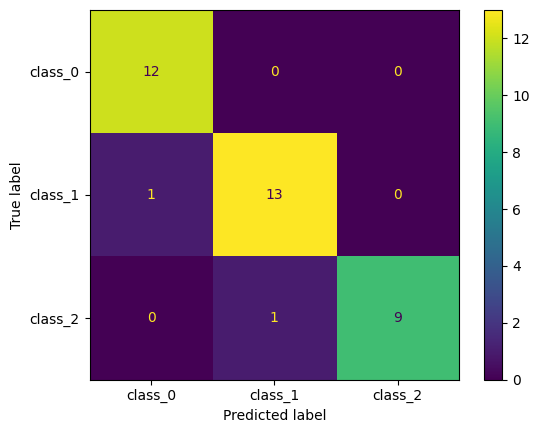

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display the confusion matrix for the last model (Gradient Boosting Classifier)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()
plt.show()